# Clustering pour les décisions Business stratégiques

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

df = pd.read_csv('customer_churn_telecom_services.csv')


num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
            "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
            "Contract", "PaperlessBilling", "PaymentMethod"]


df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)


preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


inertia = []
k_range = range(2, 11)  # Tester de 2 à 10 clusters

for k in k_range:
    kmeans = make_pipeline(preprocessor, KMeans(n_clusters=k, random_state=42, n_init=10))
    kmeans.fit(df)
    inertia.append(kmeans.named_steps["kmeans"].inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (Within-cluster sum of squares)')
plt.title("Méthode du coude pour déterminer K")
plt.show()


# On voit graphiquement que K=3


Caractéristiques moyennes par cluster:
             tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        15.559571       67.989296   1035.465199
1        57.980906       89.682371   5182.605373
2        30.547182       21.079194    668.099443


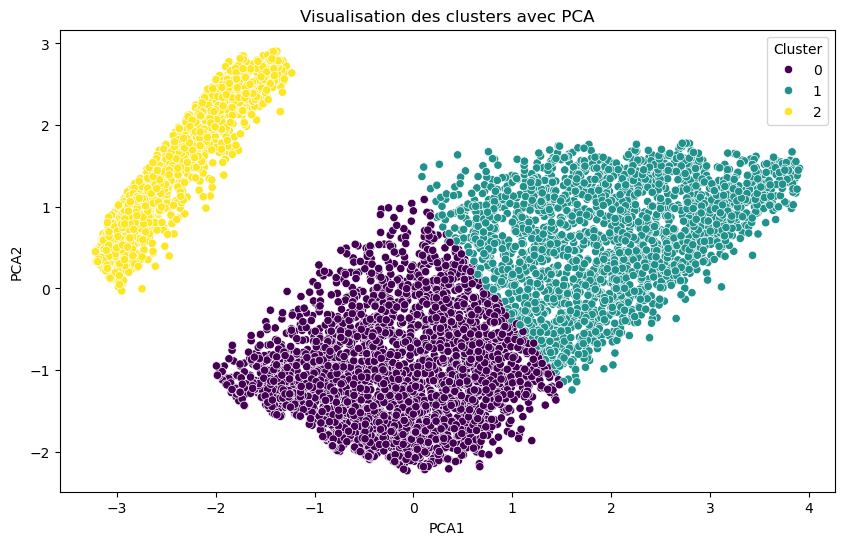

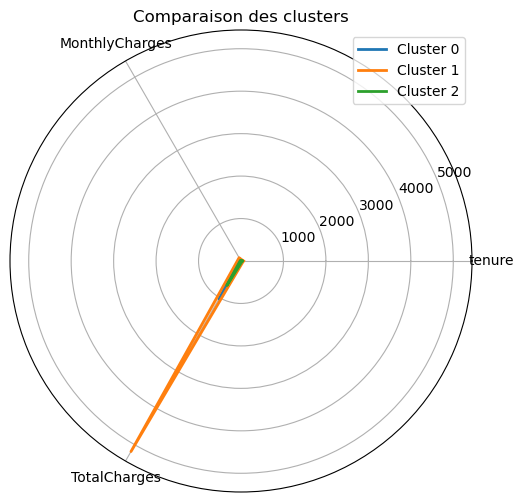

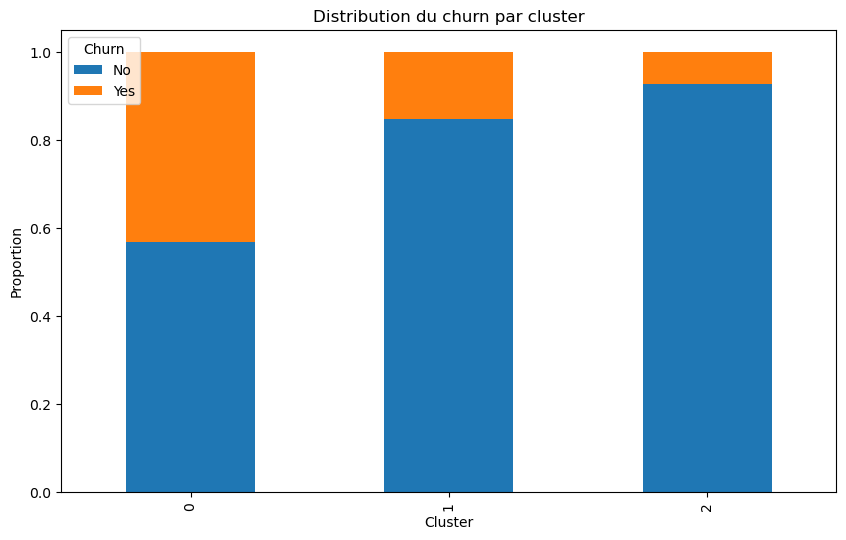


### Analyse des Clusters ###
Cluster 0 : Clients fidèles avec des dépenses élevées, faible churn. Stratégie : Upsell et fidélisation.
Cluster 1 : Clients à risque de churn avec faible tenure. Stratégie : Offres de rétention et engagement client.
Cluster 2 : Clients avec des coûts bas mais un engagement modéré. Stratégie : Cross-sell de services supplémentaires.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


file_path = "customer_churn_telecom_services.csv"
df = pd.read_csv(file_path)


num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
            "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
            "Contract", "PaperlessBilling", "PaymentMethod"]


df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)


preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


kmeans = make_pipeline(preprocessor, KMeans(n_clusters=3, random_state=42, n_init=10))
df["Cluster"] = kmeans.fit_predict(df)


cluster_summary = df.groupby("Cluster")[num_cols].mean()
print("\nCaractéristiques moyennes par cluster:\n", cluster_summary)


pca = PCA(n_components=2)
df_pca = pca.fit_transform(preprocessor.fit_transform(df))
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis")
plt.title("Visualisation des clusters avec PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


import numpy as np
from math import pi

def plot_radar_chart(cluster_data, title):
    labels = cluster_data.columns.tolist()
    num_vars = len(labels)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Boucler sur la première valeur

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for i, row in cluster_data.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=f'Cluster {i}', linewidth=2)
        ax.fill(angles, values, alpha=0.3)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title(title)
    plt.legend()
    plt.show()

plot_radar_chart(cluster_summary, "Comparaison des clusters")

cluster_churn = df.groupby("Cluster")["Churn"].value_counts(normalize=True).unstack()
cluster_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution du churn par cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.legend(title="Churn")
plt.show()


## Analyse des Clusters ###
Cluster 0 : Clients fidèles avec des dépenses élevées, faible churn. Stratégie : Upsell et fidélisation.
Cluster 1 : Clients à risque de churn avec faible tenure. Stratégie : Offres de rétention et engagement client.
Cluster 2 : Clients avec des coûts bas mais un engagement modéré. Stratégie : Cross-sell de services supplémentaires.